# Capstone 3 - Automating Deferral Discrepancy Report

# Modeling

In [1]:
# load modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_recall_curve, f1_score, auc, classification_report, roc_curve, roc_auc_score, log_loss
import shap

In [2]:
# load processed data

df = pd.read_csv('../data/processed/DVdata_processed.csv', index_col=0)
df.head()

,send,plan_cd,part_cd,pr_comp,pr_def_amt,ytd_def_amt,pr_def_pct,internal_pct_calc,diff_pr_internal_pct,rate_req_if_pct,rate_req_if_amt,annual_irs_limit,rate_issue_pr%_low,rate_issue_pr%_high,autoenroll_autoescalate_missed,no_salary_reported,comp_issue_pr%_low,comp_issue_pr%_high,over_402g,rate_type_pretax
0,0,1,1,2080.80,62.42,166.46,3.00,6.00,-3.00,6.0,0.0,19500,1,0,0,0,0,0,0,1
1,0,2,2,2273.08,272.77,272.77,12.00,13.00,-1.00,13.0,0.0,19500,1,0,0,0,0,0,0,1
2,0,3,3,10416.87,644.00,644.00,6.18,7.86,-1.68,0.0,819.0,19500,1,0,0,0,0,0,0,0
3,0,1,4,4615.38,692.31,692.31,15.00,6.00,9.00,6.0,0.0,19500,0,1,0,0,0,0,0,0
4,0,1,5,1846.16,129.23,129.23,7.00,6.00,1.00,6.0,0.0,19500,0,1,0,0,0,0,0,1


In [3]:
df.shape

(29473, 20)

In [4]:
# isolating dependent variable from features

y = df['send']
X = df.drop(columns=['send'])

X.shape, y.shape

((29473, 19), (29473,))

In [5]:
# splitting data into train/test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

DecisionTreeClassifier: Accuracy is 0.8880343813616829 
DecisionTreeClassifier: f1_score is 0.8870286840689184 


<function matplotlib.pyplot.show(close=None, block=None)>

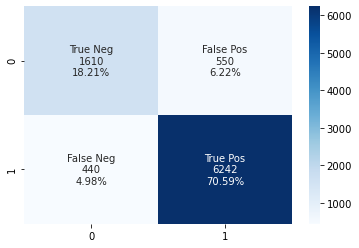

In [6]:
# DecisionTreeClassifier()

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("DecisionTreeClassifier: Accuracy is %s "%(accuracy))

f1 = f1_score(y_test, y_pred, average='weighted')
print("DecisionTreeClassifier: f1_score is %s "%(f1))

cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.show

RandomForestClassifier: Accuracy is 0.8944808866772224 
RandomForestClassifier: f1_score is 0.8908182353986924 


<function matplotlib.pyplot.show(close=None, block=None)>

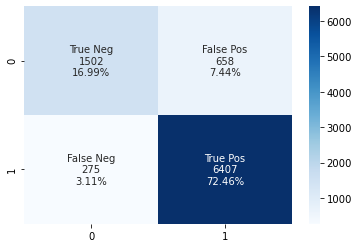

In [7]:
# RandomForestClassifier()

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("RandomForestClassifier: Accuracy is %s "%(accuracy))

f1 = f1_score(y_test, y_pred, average='weighted')
print("RandomForestClassifier: f1_score is %s "%(f1))

cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.show

AdaBoostClassifier: Accuracy is 0.8254919701425016 
AdaBoostClassifier: f1_score is 0.8069873201553704 


<function matplotlib.pyplot.show(close=None, block=None)>

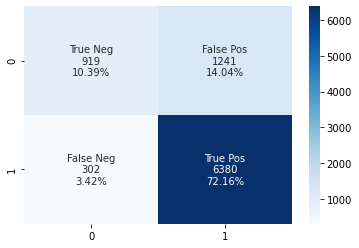

In [8]:
# AdaBoostClassifier()

ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)
y_pred = ab_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("AdaBoostClassifier: Accuracy is %s "%(accuracy))

f1 = f1_score(y_test, y_pred, average='weighted')
print("AdaBoostClassifier: f1_score is %s "%(f1))

cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.show

GradientBoostingClassifier: Accuracy is 0.8643971952047048 
GradientBoostingClassifier: f1_score is 0.8526446140151784 


<function matplotlib.pyplot.show(close=None, block=None)>

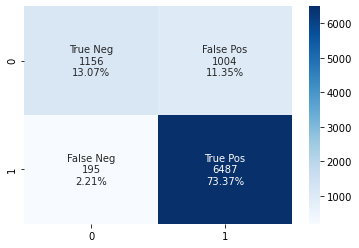

In [9]:
# GradientBoostingClassifier()

gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("GradientBoostingClassifier: Accuracy is %s "%(accuracy))

f1 = f1_score(y_test, y_pred, average='weighted')
print("GradientBoostingClassifier: f1_score is %s "%(f1))

cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.show

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:25:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier: Accuracy is 0.926939606423886 
XGBClassifier: f1_score is 0.925557580791649 


<function matplotlib.pyplot.show(close=None, block=None)>

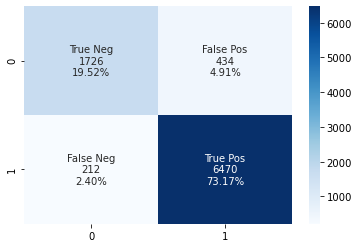

In [10]:
# XGBClassifier()

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("XGBClassifier: Accuracy is %s "%(accuracy))

f1 = f1_score(y_test, y_pred, average='weighted')
print("XGBClassifier: f1_score is %s "%(f1))

cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.show

My top two models in terms of accuracy scores are RandomForestClassifier() and XGBClassifier(). I'm going to continue on to hyperparameter tuning using GridSearch cross-validation with these models in order to select the best one.  

## Hyperparameter tuning

In [11]:
# setting param_grid variable for RandomForestClassifier GridSearchCV
param_grid_rf = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [10, 50, 100, 1000],
    'max_features': ['auto', 'sqrt', 'log2']
    }

# GridSearchCV for RandomForestClassifier model
rf_cv = GridSearchCV(
    estimator=RandomForestClassifier(), 
    param_grid=param_grid_rf, 
    cv=5, n_jobs=-1)

rf_cv.fit(X_train, y_train)

print("RandomForest Best Score: " + str(rf_cv.best_score_))
print("RandomForest Best Parameters: " + str(rf_cv.best_params_))

RandomForest Best Score: 0.8930732918636022
RandomForest Best Parameters: {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 100}


In [12]:
# setting param_grid variable for XGBClassifier GridSearchCV
param_grid_xgb = {
    'eta': [0.05, 0.3, 0.10, 0.15, 0.30],
    'max_depth': range(3,15)
    }

# GridSearchCV for XGBClassifier model
xgb_cv = GridSearchCV(
    estimator=XGBClassifier(), 
    param_grid=param_grid_xgb,
    cv=5, n_jobs=-1)

xgb_cv.fit(X_train, y_train)

print("XGBoost Best Score: " + str(xgb_cv.best_score_))
print("XGBoost Best Parameters: " + str(xgb_cv.best_params_))

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:54:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Best Score: 0.9252579956239142
XGBoost Best Parameters: {'eta': 0.15, 'max_depth': 13}


In [13]:
best_params_xgb = xgb_cv.best_params_

In [14]:
# fitting XGBClassifier model with best_params_ (see above)
model = XGBClassifier(
    eta=best_params_xgb['eta'], 
    max_depth=best_params_xgb['max_depth']
    )

model.fit(X_train, y_train)

#using model to make predictions
y_pred = model.predict(X_test)

[19:55:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<function matplotlib.pyplot.show(close=None, block=None)>

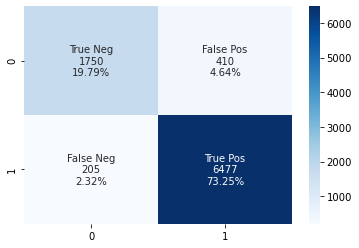

In [15]:
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.show

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      2160
           1       0.94      0.97      0.95      6682

    accuracy                           0.93      8842
   macro avg       0.92      0.89      0.90      8842
weighted avg       0.93      0.93      0.93      8842



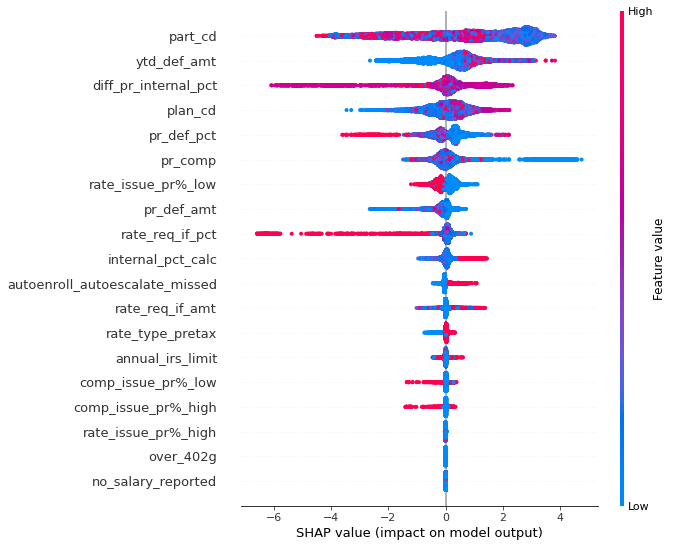

In [17]:
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train)